In [1]:
import sympy
import numpy as np
from sympy import sin,cos,exp,Matrix,pi

In [4]:
q1 = sympy.Symbol("q1")
q2 = sympy.Symbol("q2")
l1 = sympy.Symbol("l1")
l2 = sympy.Symbol("l2")



x = l1*cos(q1) + l2*cos(q1+q2)
z = l1*sin(q1) + l2*sin(q1+q2)
J = Matrix([  [x.diff(q1), x.diff(q2)],
              [z.diff(q1), z.diff(q2)]  ])


t = sympy.Symbol('t')
_q1 = sympy.Symbol("_q1")
_q2 = sympy.Symbol("_q2")
w1 = sympy.Symbol("w1")
w2 = sympy.Symbol("w2")
l1 = sympy.Symbol("l1")
l2 = sympy.Symbol("l2")

M = Matrix([  [cos(q1), cos(q1 + q2)],
              [sin(q1), sin(q1 + q2)]  ])
L = Matrix([[l1, l2]])
P = M*L.T
J = Matrix([  [P[0,:].diff(q1), P[0,:].diff(q2)],
              [P[1,:].diff(q1), P[1,:].diff(q2)]])# x=P[0,:], z=P[1,:]
print("*********J*********")
print(J)
print("*********J.inv*********")
print(J.inv())

print("********* orthogonal_matrix *********")
orth_J = J.T * J #Jの直交行列
print(orth_J)

print("********* J+ *********")
orth_J.inv() * J.T


*********J*********
Matrix([[-l1*sin(q1) - l2*sin(q1 + q2), -l2*sin(q1 + q2)], [l1*cos(q1) + l2*cos(q1 + q2), l2*cos(q1 + q2)]])
*********J.inv*********
Matrix([[-cos(q1 + q2)/(l1*sin(q1)*cos(q1 + q2) - l1*sin(q1 + q2)*cos(q1)), -sin(q1 + q2)/(l1*sin(q1)*cos(q1 + q2) - l1*sin(q1 + q2)*cos(q1))], [(-l1*cos(q1) - l2*cos(q1 + q2))/(-l1*l2*sin(q1)*cos(q1 + q2) + l1*l2*sin(q1 + q2)*cos(q1)), (-l1*sin(q1) - l2*sin(q1 + q2))/(-l1*l2*sin(q1)*cos(q1 + q2) + l1*l2*sin(q1 + q2)*cos(q1))]])
********* orthogonal_matrix *********
Matrix([[(-l1*sin(q1) - l2*sin(q1 + q2))**2 + (l1*cos(q1) + l2*cos(q1 + q2))**2, -l2*(-l1*sin(q1) - l2*sin(q1 + q2))*sin(q1 + q2) + l2*(l1*cos(q1) + l2*cos(q1 + q2))*cos(q1 + q2)], [-l2*(-l1*sin(q1) - l2*sin(q1 + q2))*sin(q1 + q2) + l2*(l1*cos(q1) + l2*cos(q1 + q2))*cos(q1 + q2), l2**2*sin(q1 + q2)**2 + l2**2*cos(q1 + q2)**2]])
********* J+ *********


Matrix([
[                                                                                                                                  -l2*(-l1*sin(q1)*sin(q1 + q2) - l1*cos(q1)*cos(q1 + q2) - l2*sin(q1 + q2)**2 - l2*cos(q1 + q2)**2)*sin(q1 + q2)/(l1**2*l2*sin(q1)**2*cos(q1 + q2)**2 - 2*l1**2*l2*sin(q1)*sin(q1 + q2)*cos(q1)*cos(q1 + q2) + l1**2*l2*sin(q1 + q2)**2*cos(q1)**2) + (-l1*sin(q1) - l2*sin(q1 + q2))*(sin(q1 + q2)**2 + cos(q1 + q2)**2)/(l1**2*sin(q1)**2*cos(q1 + q2)**2 - 2*l1**2*sin(q1)*sin(q1 + q2)*cos(q1)*cos(q1 + q2) + l1**2*sin(q1 + q2)**2*cos(q1)**2),                                                                                                                                   l2*(-l1*sin(q1)*sin(q1 + q2) - l1*cos(q1)*cos(q1 + q2) - l2*sin(q1 + q2)**2 - l2*cos(q1 + q2)**2)*cos(q1 + q2)/(l1**2*l2*sin(q1)**2*cos(q1 + q2)**2 - 2*l1**2*l2*sin(q1)*sin(q1 + q2)*cos(q1)*cos(q1 + q2) + l1**2*l2*sin(q1 + q2)**2*cos(q1)**2) + (l1*cos(q1) + l2*cos(q1 + q2))*(sin(q1 + q2)**2 + 

In [25]:
def Rz(theta):
    M = Matrix([
        [cos(theta), -sin(theta),0,0],
        [sin(theta),cos(theta),0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])
    return M

def Tz(d):
    M = Matrix([
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,d],
        [0,0,0,1]
    ])
    return M

def Rx(theta):
    M = Matrix([
        [1,0,0,0],
        [0,cos(theta),-sin(theta),0],
        [0, sin(theta),cos(theta),0],
        [0,0,0,1]
        ])
    return M 

def Tx(d):
    M = Matrix([
        [1,0,0,d],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])
    return M

1. $x_{n-1}$軸周りに$\alpha_{n-1}$だけ回転
2. $x_{n-1}$軸向きに$a_{n-1}$だけ平行移動
3. $z_{n}$軸周りに$\theta_{n}$だけ回転
4. $z_{n}$軸周りに$d_{n}$だけ平行移動
![DHParameter.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/92606/a9dc0b96-31f0-4089-a3a5-54768623faac.png)

In [29]:
alpha,theta = sympy.symbols('alpha_n-1, theta_n')
a,d = sympy.symbols('a_n-1, d_n')
T01 = Rx(alpha)*Tx(a)*Rz(theta)*Tz(d)
T01

Matrix([
[               cos(theta_n),               -sin(theta_n),               0,               a_n-1],
[sin(theta_n)*cos(alpha_n-1), cos(alpha_n-1)*cos(theta_n), -sin(alpha_n-1), -d_n*sin(alpha_n-1)],
[sin(alpha_n-1)*sin(theta_n), sin(alpha_n-1)*cos(theta_n),  cos(alpha_n-1),  d_n*cos(alpha_n-1)],
[                          0,                           0,               0,                   1]])

In [30]:
def dh_to_matrix(d, a, alpha, theta):
    """
    Convert DH parameters to a homogeneous transformation matrix.
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    T = np.array([
        [cos_theta, -sin_theta * cos_alpha, sin_theta * sin_alpha, a * cos_theta],
        [sin_theta, cos_theta * cos_alpha, -cos_theta * sin_alpha, a * sin_theta],
        [0, sin_alpha, cos_alpha, d],
        [0, 0, 0, 1]
    ])

    return T


def fk_solver(dh_params):
    """
    Calculate the forward kinematics of a robot arm given its DH parameters.
    """
    num_joints = len(dh_params)
    T_0_n_minus_1 = np.eye(4)
    T_0_n = None
    joint_positions = []

    for i in range(num_joints):
        d, a, alpha, theta = dh_params[i]
        T_i_iminus1 = dh_to_matrix(d, a, alpha, theta)
        T_0_n_minus_1 = T_0_n_minus_1 @ T_i_iminus1
        joint_positions.append(T_0_n_minus_1[:3, 3])

    T_0_n = T_0_n_minus_1 @ np.array([[0], [0], [0], [1]])

    return T_0_n, joint_positions


def ik_solver(dh_params, target_pose):
    """
    Solve inverse kinematics for a 6-DOF robot arm using the Jacobian transpose method.
    """
    # Extract target position and orientation
    target_position = target_pose[:3, 3]
    target_orientation = target_pose[:3, :3]

    # Initialize joint angles
    num_joints = len(dh_params)
    thetas = np.zeros(num_joints)

    # Set maximum number of iterations and threshold for convergence
    max_iter = 1000
    threshold = 0.001

    # Calculate homogeneous transformation matrices
    T_0_n = None
    joint_positions = []
    for i, params in enumerate(dh_params):
        d, a, alpha, theta = params
        T_i_iminus1 = dh_to_matrix(d, a, alpha, theta)
        if i == 0:
            T_0_n = T_i_iminus1
        else:
            T_0_n = T_0_n @ T_i_iminus1
        joint_positions.append(T_0_n[:3, 3])

    # Calculate inverse kinematics
    for i in range(max_iter):
        # Calculate current position of end-effector
        current_pose, _ = fk_solver(dh_params)

        # Calculate Jacobian matrix
        jacobian = np.zeros((6, num_joints))
        for j in range(num_joints):
            d, a, alpha, theta = dh_params[j]
            T_joints_jplus1, _ = fk_solver(dh_params[:j+1])
            z_axis = T_joints_jplus1[:3, 2]
            p_diff = target_position - joint_positions[j]
            if alpha == 0 and j == 0:
                jacobian[:3, j] = np.cross(z_axis, p_diff)
                jacobian[3:, j] = z_axis

In [75]:
def dh_to_matrix(dh_param):
    """
    Convert DH parameters to a homogeneous transformation matrix.
    """
    a, alpha, d, theta = dh_param
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    Ti = np.array([
        [cos_theta, -sin_theta, 0, a],
        [cos_alpha*sin_theta, cos_alpha*cos_theta, -sin_alpha, -d * sin_alpha],
        [sin_alpha*sin_theta, sin_alpha*cos_theta, cos_alpha, d*cos_alpha],
        [0, 0, 0, 1]
    ])
    return Ti

In [74]:
def jacobi_matrix(dh_params):
    joint_num = len(dh_params)
    J = np.zeros((6, joint_num))
    T_0_n = np.eye(4)
    for i in range(joint_num):
        Ti = dh_to_matrix(dh_params[i])
        T_0_n = T_0_n @ Ti
        zi = T_0_n[:3, 2]
        pi = T_0_n[:3, 3]
        J[:3, i] = np.cross(zi, pi)
        J[3:, i] = zi
    return J

theta : [    0.         -1217.60582141 -1650.33970207]
error : [-0.07657827 -0.18452769 -0.2       ]
Final joint angles: [    0.         -1217.60582141 -1650.33970207]


(-1.0, 1.0)

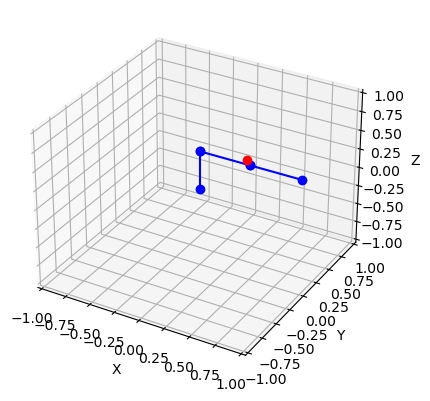

In [78]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define the target position
p_target = np.array([0.3, 0.3, 0.3])

# Define the initial joint angles and DH parameters
#a, alpha, d, theta
theta = np.array([0., 0., 0.])
dh_params = [(0, theta[0], 0.5, 0),
             (0.5, 0, 0, theta[1]),
             (0.5, 0, 0, theta[2])]

# Define the maximum number of iterations and the tolerance for convergence
max_iterations = 1000
tolerance = 1e-6

def inverse_kinematics(p_target, dh_params, max_iterations, tolerance):
    for i in range(max_iterations):
        # Calculate the current position of the end-effector
        p_current = forward_kinematics(dh_params)[-1][:3, 3]
        
        # Calculate the error vector and check for convergence
        error = p_target - p_current
        
        if np.linalg.norm(error) < tolerance:
            print("get no error param")
            break
        
        # Calculate the Jacobian matrix
        J = jacobi_matrix(dh_params)[:3,:3]
        
        # Calculate the pseudo-inverse of the Jacobian matrix
        J_inv = np.linalg.pinv(J)
        
        # Calculate the joint velocities
        v = np.dot(J_inv, error)

        # Update the joint angles
        global theta
        theta += v
        
        # Update the DH parameters
        #for j in range(len(dh_params)):
        #    dh_params[j] = (dh_params[j][0], dh_params[j][1], dh_params[j][2], theta[j])
        dh_params = [(0, theta[0], 0.5, 0),
             (0.5, 0, 0, theta[1]),
             (0.5, 0, 0, theta[2])]
        
    print("theta : {}".format(theta))
    print("error : {}".format(error))
    return theta

def forward_kinematics(dh_params):
    n = len(dh_params)
    T = np.eye(4)
    T_list = [T]
    for i in range(n):
        Ti = dh_to_matrix(dh_params[i])
        T = T @ Ti
        T_list.append(T)
    return T_list

# Perform inverse kinematics
theta = inverse_kinematics(p_target, dh_params, max_iterations, tolerance)

# Print the final joint angles
print("Final joint angles:", theta)

# Plot the robot arm in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T_list = forward_kinematics(dh_params)
for i in range(len(T_list)-1):
    p1 = T_list[i][:3, 3]
    p2 = T_list[i+1][:3, 3]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 'b',marker='o')
ax.plot(p_target[0],p_target[1],p_target[2], 'r',marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)